In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv(r"C:\Users\BIGYAJEET\Downloads\Churn_Modelling.csv")
data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
data.dtypes


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
for i in ['Surname','Geography','Gender']:
    print(i,':','\n',data[i].unique())

Surname : 
 ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography : 
 ['France' 'Spain' 'Germany']
Gender : 
 ['Female' 'Male']


In [6]:
data.shape

(10000, 14)

In [7]:
import warnings
warnings.filterwarnings('ignore')

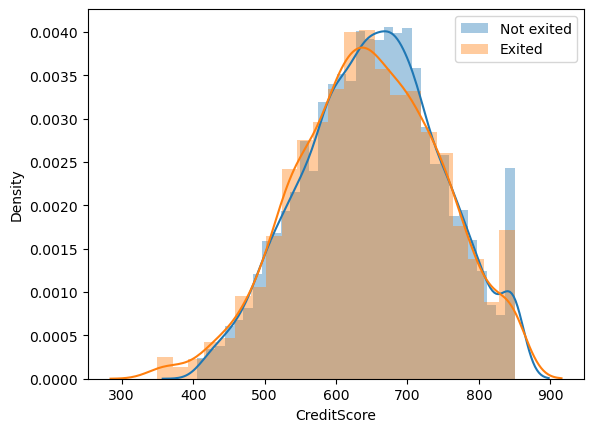

In [8]:
sns.distplot(data.CreditScore[data.Exited==0],label='Not exited')
sns.distplot(data.CreditScore[data.Exited==1],label='Exited') 
plt.legend()
plt.show()

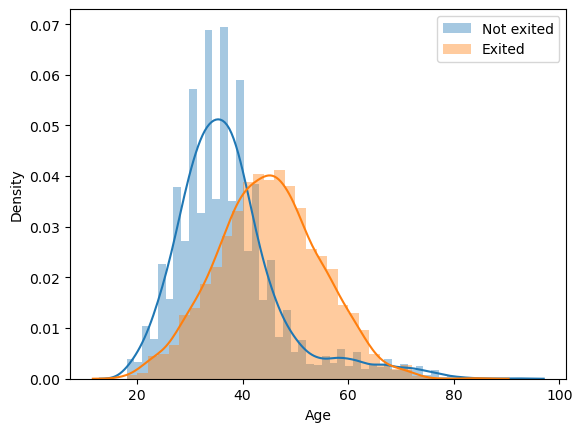

In [9]:
sns.distplot(data.Age[data.Exited==0],label='Not exited')
sns.distplot(data.Age[data.Exited==1],label='Exited') 
plt.legend()
plt.show()

<Axes: xlabel='Geography', ylabel='count'>

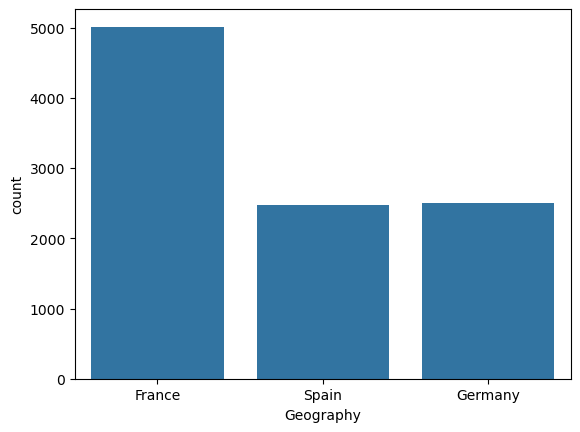

In [10]:
sns.countplot(x=data.Geography)

<Axes: xlabel='Geography', ylabel='count'>

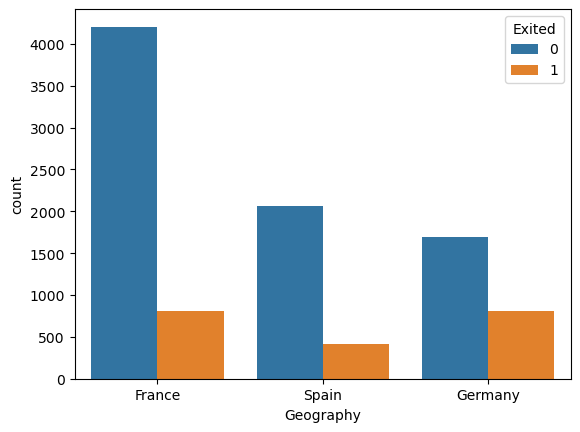

In [11]:
sns.countplot(x=data.Geography,hue=data.Exited)

<Axes: xlabel='Gender', ylabel='count'>

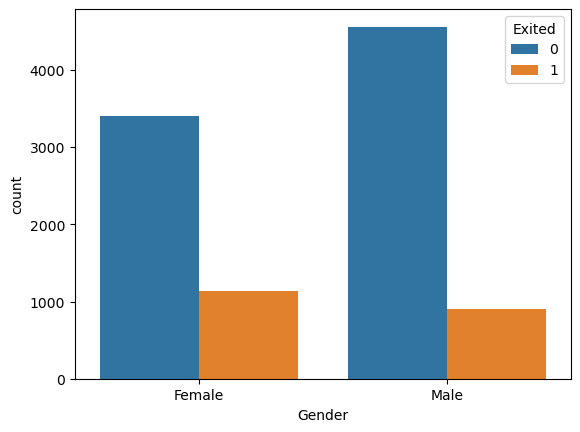

In [12]:
sns.countplot(x=data.Gender,hue=data.Exited)

<Axes: xlabel='Geography', ylabel='Age'>

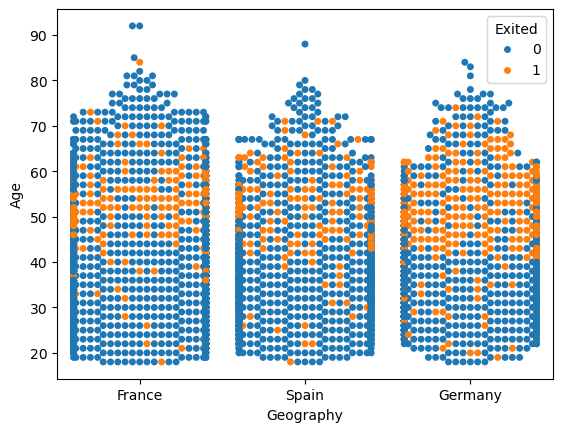

In [13]:
sns.swarmplot(x=data.Geography,y=data.Age,hue=data.Exited)

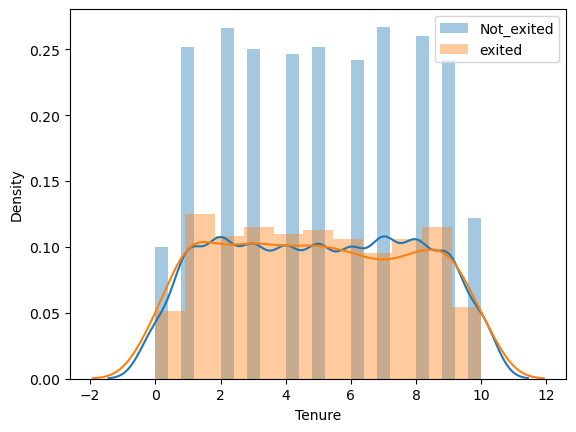

In [14]:
sns.distplot(data.Tenure[data.Exited==0],label='Not_exited')
sns.distplot(data.Tenure[data.Exited==1],label='exited')
plt.legend()
plt.show()

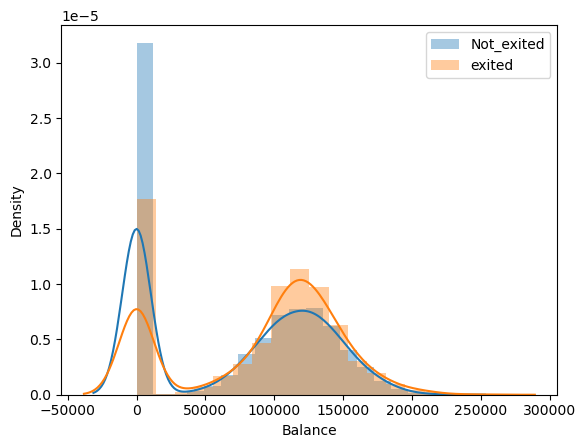

In [15]:
sns.distplot(data.Balance[data.Exited==0],label='Not_exited')
sns.distplot(data.Balance[data.Exited==1],label='exited')
plt.legend()
plt.show()

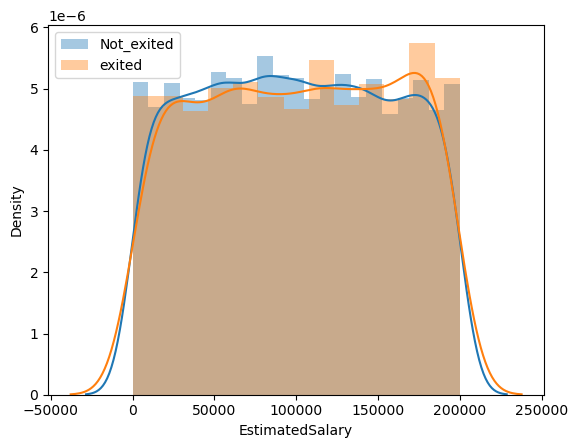

In [16]:
sns.distplot(data.EstimatedSalary[data.Exited==0],label='Not_exited')
sns.distplot(data.EstimatedSalary[data.Exited==1],label='exited')
plt.legend()
plt.show()

<Axes: xlabel='HasCrCard', ylabel='count'>

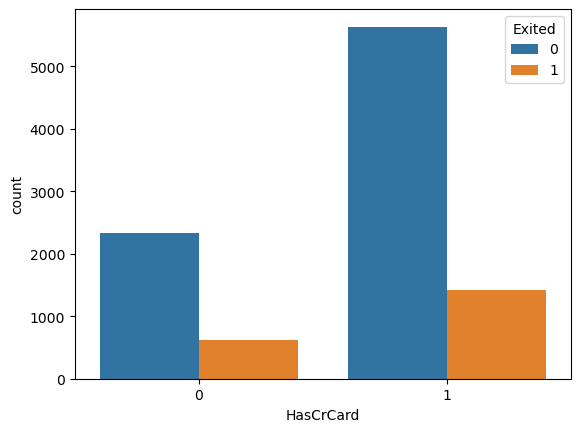

In [17]:
sns.countplot(x=data.HasCrCard,hue=data.Exited)

In [18]:
data1=data.drop(['Surname','RowNumber','CustomerId'],axis=1)

In [19]:
data1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1.Geography=le.fit_transform(data1.Geography)
le1=LabelEncoder()
data1.Gender=le1.fit_transform(data1.Gender)

In [22]:
data1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [23]:
data2=data1.corr()

In [24]:
data2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

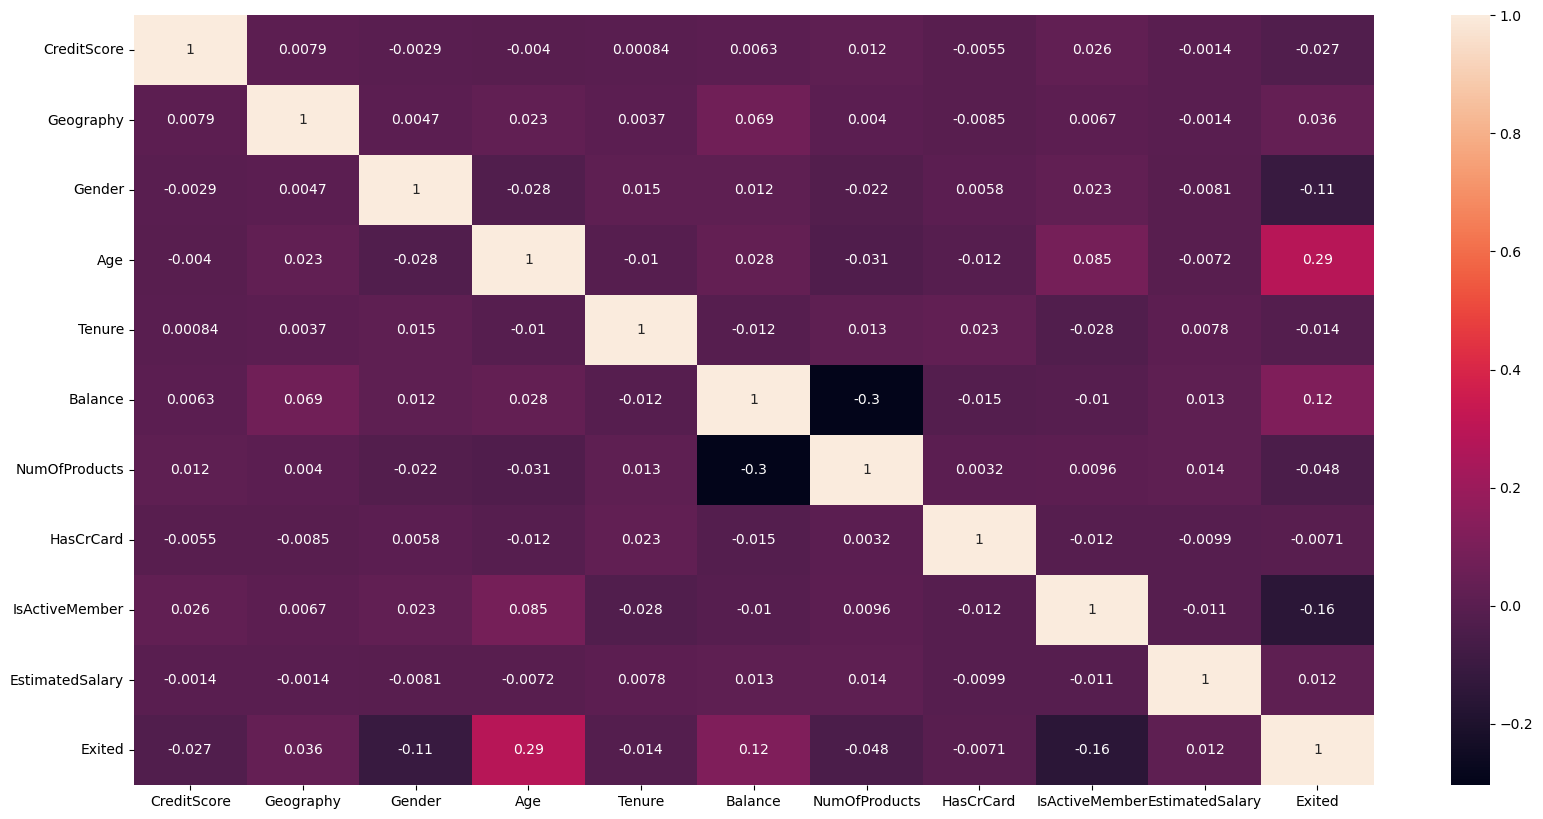

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(data2,annot=True)